In [27]:
import pandas as pd
import os

# Define file paths
train_excel_path = "Training Data-Potential Airdrop Project.xlsx"
test_excel_path = "Test Data-Potential Airdrop Project.xlsx"

train_csv_path = "Training_Data.csv"
test_csv_path = "Test_Data.csv"

# Function to convert Excel to CSV safely
def convert_excel_to_csv(excel_path, csv_path):
    if not os.path.exists(excel_path):
        print(f"Error: File '{excel_path}' not found.")
        return
    try:
        df = pd.read_excel(excel_path)
        df.to_csv(csv_path, index=False)
        print(f"Conversion successful: {csv_path}")
    except Exception as e:
        print(f"Error processing '{excel_path}': {e}")

# Convert files
convert_excel_to_csv(train_excel_path, train_csv_path)
convert_excel_to_csv(test_excel_path, test_csv_path)


Conversion successful: Training_Data.csv
Conversion successful: Test_Data.csv


In [31]:
# File paths
train_csv = "Training_Data.csv"
test_csv = "Test_Data.csv"

# Function to load CSV safely
def load_csv(file_path):
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' not found.")
        return None
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded: {file_path} ({df.shape[0]} rows, {df.shape[1]} columns)")
        return df
    except Exception as e:
        print(f"Error loading '{file_path}': {e}")
        return None

# Load datasets
train_df = load_csv(train_csv)
test_df = load_csv(test_csv)

# Proceed only if data is loaded successfully
if train_df is not None and test_df is not None:
    # Display first few rows
    print("\nTraining Data Preview:")
    print(train_df.head())

    print("\nTest Data Preview:")
    print(test_df.head())

    # Check for missing values
    print("\nMissing Values in Training Data (%):")
    print((train_df.isnull().sum() / len(train_df) * 100).round(2).astype(str) + "%")

    print("\nMissing Values in Test Data (%):")
    print((test_df.isnull().sum() / len(test_df) * 100).round(2).astype(str) + "%")

    # Display basic statistics for numerical columns
    print("\nTraining Data Statistics:")
    print(train_df.describe())

    # Check unique values in categorical columns
    categorical_cols = train_df.select_dtypes(include=['object']).columns
    print("\nCategorical Column Unique Values:")
    for col in categorical_cols:
        print(f"{col}: {train_df[col].nunique()} unique values")

    # Outlier detection (basic: checking for extreme values)
    print("\nPotential Outliers (Values Beyond 3 Standard Deviations):")
    outliers = ((train_df.select_dtypes(include=['number']) - train_df.mean()) / train_df.std()).abs() > 3
    print(outliers.sum())  # Number of outliers per column


Successfully loaded: Training_Data.csv (348 rows, 18 columns)
Successfully loaded: Test_Data.csv (30 rows, 18 columns)

Training Data Preview:
  Project Name  Funding ($M) Tasks Required  Free to Join(Yes=1, No=0)  \
0           0x          24.0        Unknown                          0   
1    Aeternity          24.0        Unknown                          0   
2   Ampleforth           9.8        Unknown                          0   
3       Aragon          25.0        Unknown                          0   
4    AriseBank         600.0        Unknown                          0   

   VC Backing(Yes=1, No=0)  Airdrop Longevity (Days)   Token Utility  \
0                        1                         7             DEX   
1                        1                         7  Smart Contract   
2                        1                         7  Elastic Supply   
3                        1                         7      Governance   
4                        0                         7

TypeError: Could not convert ['0xAeternityAmpleforthAragonAriseBankArkAugurBancorBasis ProtocolBenebitBitCloutBitConnectBitconnect XBlockFiBreadCentra TechCivicConcordiumConfidoCredDavorcoinDeepBrain ChainDentacoinDragonChainDusk NetworkElastosElectroneumEnigmaEnvionFei ProtocolAuroracoinHiveGolemHodlnautICONiFanIOSTKinKomodoKyber NetworkLiskMaidsafeMastercoin/OmniSteemitNebulasNexoOasis NetworkOneCoinOyster ProtocolPaycoinPincoinPlexCoinPlusTokenPower LedgerProdeumPundi XQtumREcoinReddcoinSALTSavedroidSirin LabsStatusStratisSubstratumTitanium BlockchainTRONVauldVeChainWaltonchainWanchainWavesAbracadabraAkita InuBananoBasis CashBeefy FinanceBitcoinDarkBitUSDBrettAnoncoinBBQCoinBeamBitgemBytecoinDashDevcoinDigitalcoinDeepOnionDogecoinFastcoinDoge KillerFeathercoinDogecoin CashDogelon MarsDogwifhatFreicoinDynamic Set DollarGoldcoinEmpty Set DollarGrinHorizenI0CoinInfinitecoinIxcoinFloki InuMegacoinMincoinMonaCoinMoneroMooncoinNamecoinNavCoinNovacoinPeercoinPhoenixcoinPotcoinPrimecoinQuarkHextraSiaHoge FinanceTerracoinVertcoinZcashZetacoinIRON TitaniumKishu InuKlima DAOKusamaNuBitsNeutrino USDGridcoinEinsteiniumOlympus DAOFriend.techBonkParticlPepeQuadrigaCXRedacted CartelSafeDollarSafeMoonSaitama InuSamoyedcoinSecret NetworkShiba InuSociosPIVXSquid GameTemple DAOTerra USTTerraUSDThodex TokenTornado CashVergeWalletConnectWojakWonderlandYearn FinanceLuna ClassicTerraSerumJupiterHop ProtocolFTX TokenOliveXOptimismPyth NetworkLivepeerCelestiaSuiMango MarketsPangolinSaberDotmoovsRenderJitoLidoConnextAudiusWalkenMarinade FinanceScrollSeidYdXCasperSpace IDMines of DalarniaSomnium SpaceFitfiStep AppSTEPVRTreasure DAOLens ProtocolAkash NetworkAptosLineaOrcazkSyncStarknetInjectiveWorldcoinAleph.imAcross ProtocolAvalancheCrust NetworkCudosDIASynapseEOSFilecoinFluxLoopringNumeraireSolana Name ServicePolkadotTezosUmbrella NetworkZKSpace1inchDecentral GamesAlchemixGods UnchainedMerit CircleThe GraphSushiSwapBloktopiaMetaheroCentrifugeCovalentTellorGenopetsStepnLayerZeroMantleRaribleMirror ProtocolRibbon FinanceFarcasterOpynBifrostEfinityCosmosStargazeSorareGalxeBaseTrueFiWormholeRaydiumTrader JoeArbitrumUnstoppable DomainsPolygonMy Neighbor AliceWilder WorldSweatcoinOntologyBlurThe SandboxArweaveAnkrStargate FinanceIoTeXMetisGitcoinOcean ProtocolOraichainSingularityNETStar AtlasStorjVoyagerVoyager TokenAlien WorldsAPI3Yield Guild GamesAxelarDopexGoldfinchHarvest FinanceHyperlaneLiquityBored Ape Yacht ClubMaple FinanceRMRKSuperRarePocket NetworkNest ProtocolMoonbeamParallel FinancePhala NetworkRallyIlluviumJunoStrideUMAUniswapUXD ProtocolPerpetual ProtocolCardanoNear ProtocolGala GamesLooksRareBasic Attention TokenBrave Attention TokenDecentralandFetch.aiMina ProtocolHandshakeMXCPresearchSynthetixThetaAxie InfinityWINkLinkPancakeSwapBrave SearchDapper LabsFrax FinanceImmutable XAcalaAstarOsmosisGains NetworkDfinityInternet ComputerAlgorandBand ProtocolCelsiusNervos NetworkENSEthereum Name ServiceBalancerBadger DAOEvmosChilizZilliqaRocket PoolMoonriverConvex FinanceGMXChainlinkHeliumSolanaNEOCurveNXT'
 'UnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownCitizenshipContentUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownContentUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownMiningMiningMiningMiningMiningMiningMiningMiningUnknownMiningMiningUnknownMiningUnknownUnknownUnknownMiningUnknownMiningUnknownMiningMiningMiningMiningMiningUnknownMiningMiningMiningMiningMiningMiningMiningMiningMiningMiningMiningMiningMiningUnknownMiningUnknownMiningMiningMiningMiningUnknownUnknownUnknownUnknownPeercoin HoldersUnknownScientific ComputingScientific FundingUnknownSocialSolana HoldersUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownStakingUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownUnknownTradingBridge UsageUnknownMove-to-EarnUnknownUnknownStakingTestnetTestnetTradingTradingLiquidityMove-to-EarnUnknownStakingUnknownBridge UsageUnknownMove-to-EarnStakingTestnetTestnetTradingUnknownDomainGamingMetaverseMove-to-EarnMove-to-EarnMove-to-EarnNFTSocialStakingTestnetTestnetTradingUnknownTestnetTradingBiometricUnknownBridge UsageUnknownUnknownUnknownUnknownBridge UsageUnknownUnknownUnknownUnknownData ScienceDomainUnknownUnknownUnknownUnknownUnknownGamingUnknownGamingGamingIndexingLiquidityMetaverseMetaverseUnknownUnknownMiningMove-to-EarnMove-to-EarnUnknownUnknownNFTUnknownProtocol UsageSocialUnknownStakingStakingStakingStakingUnknownTasksTestnetUnknownUnknownTradingTradingUnknownDomainUnknownGamingMetaverseMove-to-EarnNEO HoldersTradingUnknownUnknownUnknownBridge UsageUnknownUnknownContributionsUnknownUnknownUnknownUnknownUnknownUnknownUnknownGamingUnknownGamingUnknownUnknownUnknownUnknownUnknownUnknownNFTUnknownNFTNFTNodeUnknownStakingStakingStakingUnknownStakingStakingStakingUnknownUnknownUnknownTradingUnknownUnknownGamingNFTUnknownUnknownUnknownUnknownUnknownDomainUnknownUnknownUnknownUnknownGamingUnknownLiquidityUnknownUnknownUnknownNFTStakingStakingStakingTradingUnknownUnknownUnknownUnknownUnknownUnknownDomain RegistrationDomain RegistrationLiquidityUnknownStakingUnknownUnknownNodeStakingStakingTradingUnknownMiningUnknownUnknownLiquidityUnknown'
 'DEXSmart ContractElastic SupplyGovernanceBankingGovernance, Layer 1Prediction MarketDEXStablecoinLoyaltySocialLendingExchangeLendingWalletPaymentIdentityPrivacyEscrowLendingLendingAI ComputingDentalBlockchain PlatformPrivacyOperating SystemMobile MiningPrivacyMiningStablecoinCurrencyGovernance, SocialComputingLendingGovernance, Layer 1SocialInfrastructureSocialPrivacyDEXGovernance, Layer 1StoragePlatformGovernance, SocialSearch EngineLendingPrivacyPaymentStoragePaymentInvestmentPaymentWalletEnergySupply ChainPaymentGovernance, Layer 1Real EstateSocialLendingSavingsHardwareMessagingGovernance, Layer 1Decentralized WebInfrastructureGovernance, Layer 1LendingSupply ChainSupply ChainInteroperabilityGovernance, Layer 1LendingMemeMemeStablecoinGovernance, YieldPrivacyStablecoinMemePrivacyCurrencyPrivacyCurrencyPrivacyPrivacyCurrencyCurrencyPrivacyCurrencyCurrencyMemeCurrencyMemeMemeMemeCurrencyStablecoinCurrencyStablecoinPrivacyPrivacyCurrencyCurrencyCurrencyMemeCurrencyCurrencyMemePrivacyCurrencyDomainPrivacyCurrencyCurrencyCurrencyIndustryCurrencyCurrencyDeFiUtility, StorageMemeCurrencyCurrencyPrivacyCurrencyStablecoinMemeCarbon CreditsGovernance, StakingStablecoinStablecoinComputingCharityReserve CurrencyGovernance, SocialMemePrivacyMemeExchangeGovernanceStablecoinReflectionMemeMemePrivacyMemeGovernance, SportsPrivacyGamingReserve CurrencyStablecoinStablecoinExchangePrivacyPrivacyInfrastructureMemeReserve CurrencyGovernance, YieldGovernance, StablecoinStablecoinGovernance, Fee ReductionGovernance, Fee SharingGovernanceExchange, UtilityGovernance, UtilityGovernanceGovernance, OracleGovernance, StakingGovernance, StakingGovernance, StakingGovernanceGovernanceGovernanceGovernance, UtilityGovernance, UtilityGovernance, StakingGovernanceGovernanceGovernance, PlatformGovernance, UtilityGovernanceGovernance, Layer 2Governance, StakingGovernance, Fee ReductionGovernance, Layer 1Governance, DomainGovernance, GamingGovernance, MetaverseGovernance, UtilityGovernance, UtilityGovernance, UtilityGovernance, NFTGovernance, SocialGovernance, UtilityGovernance, StakingGovernance, Layer 2Governance, Fee SharingGovernance, Layer 2Governance, StakingGovernance, StakingGovernance, IdentityUtility, CloudGovernance, BridgeGovernance, Layer 1Utility, StorageUtility, CloudUtility, OracleGovernance, BridgeGovernance, Layer 1Utility, StorageUtility, CloudGovernance, Layer 2Utility, AIGovernance, DomainGovernance, StakingGovernance, Layer 1Governance, OracleGovernance, Layer 2GovernanceGovernance, GamingGovernance, LendingGovernance, GamingGovernance, GamingGovernance, IndexingGovernance, AMMGovernance, MetaverseGovernance, MetaverseGovernance, DeFiGovernance, DataGovernance, OracleGovernance, GamingGovernance, UtilityGovernance, BridgeGovernance, Layer 2Governance, NFTGovernance, SyntheticsGovernance, Fee SharingGovernance, SocialGovernance, OptionsGovernance, DeFiGovernance, NFTGovernance, StakingGovernance, NFTGovernance, SportsGovernance, UtilityGovernance, Layer 2Governance, LendingGovernance, BridgeGovernance, StakingGovernance, Fee SharingGovernanceGovernance, DomainGovernance, Layer 2Governance, GamingGovernance, MetaverseGovernance, UtilityGovernance, Layer 1Governance, Fee ReductionGovernance, MetaverseUtility, StorageUtility, CloudGovernance, BridgeUtility, IoTGovernance, Layer 2GovernanceUtility, DataGovernance, OracleUtility, AIGovernance, GamingUtility, StorageExchangeUtility, ExchangeGovernance, GamingUtility, OracleGovernance, GamingGovernance, BridgeGovernance, OptionsGovernance, LendingGovernance, YieldGovernance, BridgeGovernance, StablecoinGovernance, NFTGovernance, LendingGovernance, NFTGovernance, NFTUtility, InfrastructureGovernance, OracleGovernance, StakingGovernance, DeFiGovernance, PrivacyGovernance, SocialGovernance, GamingGovernance, Smart ContractGovernance, Liquid StakingGovernance, OracleGovernanceGovernance, StablecoinGovernance, TradingGovernance, Layer 1Governance, Layer 1Governance, GamingGovernance, NFTUtility, AdvertisingUtility, AdvertisingGovernance, MetaverseUtility, AIGovernance, Layer 1Governance, DomainUtility, IoTUtility, SearchGovernance, SyntheticsUtility, VideoGovernance, GamingUtility, OracleGovernance, AMMUtility, SearchGovernance, NFTGovernance, StablecoinGovernance, NFTGovernance, DeFiGovernance, StakingGovernance, StakingGovernance, TradingGovernance, CloudGovernance, CloudGovernance, Layer 1Utility, OracleUtility, LendingGovernance, Layer 1GovernanceGovernance, DomainGovernance, AMMGovernance, YieldGovernance, Smart ContractGovernance, SportsGovernance, Layer 1Governance, Liquid StakingGovernance, StakingGovernance, YieldGovernance, TradingUtility, OracleGovernance, UtilityGovernance, Layer 1Governance, Layer 1Governance, AMMPlatform'
 'EthereumAeternityEthereumEthereumEthereumARKEthereumEthereumEthereumEthereumBitCloutBitConnectBitConnectEthereumEthereumEthereumEthereumConcordiumEthereumEthereumEthereumNEOEthereumEthereumDuskElastosElectroneumEthereumEthereumEthereumAuroracoinHiveEthereumEthereumICONEthereumIOSTSolanaKomodoEthereumLiskOmniOmniSteemNebulasEthereumOasisOneCoinEthereumPaycoinEthereumEthereumEthereumEthereumEthereumEthereumQtumEthereumReddcoinEthereumEthereumEthereumEthereumStratisEthereumEthereumTRONEthereumVeChainEthereumWanchainWavesEthereumEthereumBananoEthereumMulti-chainBitcoinDarkBitSharesSolanaAnoncoinBBQCoinBeamBitgemBytecoinDashDevcoinDigitalcoinDeepOnionDogecoinFastcoinEthereumFeathercoinDogecoin CashEthereumSolanaFreicoinEthereumGoldcoinEthereumGrinHorizenI0CoinInfinitecoinIxcoinEthereumMegacoinMincoinMonaCoinMoneroMooncoinNamecoinNavCoinNovacoinPeercoinPhoenixcoinPotcoinPrimecoinQuarkEthereumSiaEthereumTerracoinVertcoinZcashZetacoinPolygonEthereumPolygonKusamaNuBitsWavesGridcoinEinsteiniumEthereumBaseSolanaParticlEthereumEthereumEthereumPolygonBNB ChainEthereumSolanaSecretEthereumChilizPIVXBNB ChainEthereumTerraTerraEthereumEthereumVergeEthereumEthereumAvalancheEthereumTerraTerraSolanaSolanaEthereumEthereumPolygonEthereumSolanaEthereumCelestiaSuiSolanaAvalancheSolanaEthereumEthereumSolanaEthereumEthereumEthereumSolanaSolanaEthereumSeiEthereumCasperBNB ChainBNB ChainEthereumBNB ChainAvalancheBNB ChainArbitrumPolygonCosmosAptosEthereumSolanaEthereumStarknetInjectiveEthereumEthereumEthereumAvalanchePolkadotEthereumEthereumMulti-chainEOSFilecoinFluxEthereumEthereumSolanaPolkadotTezosEthereumEthereumEthereumPolygonEthereumEthereumEthereumEthereumEthereumPolygonBNB ChainPolkadotEthereumEthereumSolanaSolanaMulti-chainEthereumEthereumTerraEthereumEthereumEthereumPolkadotPolkadotCosmosCosmosEthereumEthereumEthereumEthereumMulti-chainSolanaAvalancheEthereumPolygonEthereumEthereumEthereumNearOntologyEthereumEthereumArweaveEthereumMulti-chainIoTeXEthereumEthereumEthereumCosmosEthereumSolanaEthereumEthereumEthereumWAXEthereumEthereumCosmosArbitrumEthereumEthereumMulti-chainEthereumEthereumEthereumKusamaEthereumPocketEthereumPolkadotPolkadotPolkadotEthereumEthereumCosmosCosmosEthereumEthereumSolanaEthereumCardanoNearEthereumEthereumEthereumEthereumEthereumEthereumMinaHandshakeEthereumEthereumEthereumThetaEthereumTRONBNB ChainEthereumFlowEthereumEthereumPolkadotPolkadotCosmosPolygonInternet ComputerInternet ComputerAlgorandCosmosEthereumNervosEthereumEthereumEthereumEthereumCosmosEthereumZilliqaEthereumKusamaEthereumArbitrumEthereumHeliumSolanaNEOEthereumNXT'
 'DeFiLayer 1DeFiGovernanceBankingLayer 1PredictionDeFiStablecoinLoyaltySocialDeFiExchangeDeFiWalletPaymentIdentityPrivacyEscrowDeFiLendingAIIndustryInfrastructurePrivacyInfrastructureMobilePrivacyMiningStablecoinCurrencySocialComputingDeFiLayer 1SocialLayer 1SocialPrivacyDeFiLayer 1StorageLayer 1SocialInfrastructureDeFiPrivacyPaymentStoragePaymentInvestmentPaymentWalletEnergySupply ChainPaymentLayer 1Real EstateSocialDeFiFinanceHardwareSocialLayer 1InfrastructureInfrastructureLayer 1DeFiSupply ChainSupply ChainInfrastructureLayer 1DeFiMemeMemeStablecoinDeFiPrivacyStablecoinMemePrivacyCurrencyPrivacyCurrencyPrivacyPrivacyCurrencyCurrencyPrivacyCurrencyCurrencyMemeCurrencyMemeMemeMemeCurrencyStablecoinCurrencyStablecoinPrivacyPrivacyCurrencyCurrencyCurrencyMemeCurrencyCurrencyMemePrivacyCurrencyDomainPrivacyCurrencyLayer 1CurrencyIndustryCurrencyCurrencyDeFiStorageMemeCurrencyCurrencyPrivacyCurrencyStablecoinMemeDeFiLayer 1StablecoinStablecoinComputingCharityDeFiSocialMemePrivacyMemeExchangeDeFiStablecoinDeFiMemeMemePrivacyMemeSportsPrivacyGamingDeFiStablecoinStablecoinExchangePrivacyPrivacyInfrastructureMemeDeFiDeFiLayer 1DeFiDeFiDeFiDeFiExchangeMove-to-EarnLayer 2OracleWeb3Layer 1Layer 1DeFiDeFiDeFiMove-to-EarnWeb3DeFiDeFiDeFiSocialMove-to-EarnDeFiLayer 2Layer 1DeFiLayer 1DomainGamingMetaverseMove-to-EarnMove-to-EarnMove-to-EarnNFTSocialCloudLayer 1Layer 2DeFiLayer 2Layer 2DeFiIdentityCloudDeFiLayer 1StorageCloudOracleDeFiLayer 1StorageCloudLayer 2AIDomainLayer 1Layer 1OracleLayer 2DeFiGamingDeFiGamingGamingWeb3DeFiMetaverseMetaverseDeFiDataOracleMove-to-EarnMove-to-EarnInfrastructureLayer 2NFTDeFiDeFiSocialDeFiDeFiNFTLayer 1NFTSportsWeb3Layer 2DeFiInfrastructureDeFiDeFiLayer 2DomainLayer 2GamingMetaverseMove-to-EarnLayer 1NFTMetaverseStorageCloudDeFiIoTLayer 2Web3DataOracleAIGamingStorageExchangeExchangeGamingOracleGamingInfrastructureDeFiDeFiDeFiInfrastructureDeFiNFTDeFiNFTNFTInfrastructureOracleLayer 1DeFiPrivacySocialGamingLayer 1DeFiOracleDeFiDeFiDeFiLayer 1Layer 1GamingNFTAdvertisingAdvertisingMetaverseAILayer 1DomainIoTSearchDeFiVideoGamingOracleDeFiSearchNFTDeFiNFTDeFiLayer 1DeFiDeFiCloudCloudLayer 1OracleDeFiLayer 1Web3Web3DeFiDeFiLayer 1SportsLayer 1DeFiLayer 1DeFiDeFiOracleIoTLayer 1Layer 1DeFiLayer 1'] to numeric

In [33]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
train_df = pd.read_csv("Training_Data.csv")
test_df = pd.read_csv("Test_Data.csv")

# Encode categorical variables using factorize (ensures consistent encoding)
categorical_cols = ["Token Utility", "Blockchain", "Sector", "Tasks Required"]
encoding_maps = {}

for col in categorical_cols:
    train_df[col], uniques = pd.factorize(train_df[col], sort=True)  # Ensures same order across runs
    test_df[col] = test_df[col].apply(lambda x: uniques.get_loc(x) if x in uniques else -1)  # Handle unseen categories
    encoding_maps[col] = list(uniques)

# Scale numerical features
num_cols = ["Funding ($M)", "Airdrop Longevity (Days)", "Team Size",
            "Twitter Followers", "Community Size", "Initial Value ($)", 
            "Peak Value ($)", "Average value($)"]

scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

# Save processed data
train_df.to_csv("Processed_Training_Data.csv", index=False)
test_df.to_csv("Processed_Test_Data.csv", index=False)

# Save encoding map for future inference
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in encoding_maps.items()])).to_csv("Categorical_Encoding_Map.csv", index=False)

print("✅ Data preprocessing completed. Processed files saved.")


✅ Data preprocessing completed. Processed files saved.


In [35]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  # Suppress warnings for cleaner output

# Load preprocessed data
train_df = pd.read_csv("Processed_Training_Data.csv")
test_df = pd.read_csv("Processed_Test_Data.csv")

# Define features and target
target_col = "Success Score (0-10)"
drop_cols = ["Project Name", target_col]

X_train = train_df.drop(columns=drop_cols, errors="ignore")  # Ignore missing columns
y_train = train_df[target_col]
X_test = test_df.drop(columns=drop_cols, errors="ignore")
y_test = test_df[target_col]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),  # Tuned params
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42),
    "SVR": SVR(kernel="rbf", C=100, gamma=0.1),  # Tuned params
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

# Display results in a readable format
results_df = pd.DataFrame(results).T.round(4)
print("\nModel Performance Comparison:")
print(results_df)

# Feature Importance for Tree-Based Models
for name, model in models.items():
    if hasattr(model, "feature_importances_"):
        print(f"\nFeature Importance - {name}:")
        feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
        print(feature_importance.head(10))  # Show top 10 features



Model Performance Comparison:
                      MAE    RMSE       R²
Linear Regression  1.4942  1.7925  -4.9654
Random Forest      1.3419  1.6589  -4.1091
Gradient Boosting  1.3732  1.7255  -4.5275
SVR                2.0098  2.1500  -7.5821
Neural Network     1.9547  2.9175 -14.8034

Feature Importance - Random Forest:
GitHub Activity(Low=0, Medium=1, High=2)    0.305119
Twitter Followers                           0.218014
Token Utility                               0.143402
Team Size                                   0.090415
Community Size                              0.064327
Funding ($M)                                0.032212
Blockchain                                  0.030452
Peak Value ($)                              0.021697
Free to Join(Yes=1, No=0)                   0.021578
Initial Value ($)                           0.017802
dtype: float64

Feature Importance - Gradient Boosting:
GitHub Activity(Low=0, Medium=1, High=2)    0.305521
Twitter Followers                  

In [37]:
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]  # Adds feature selection criteria
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Use RandomizedSearchCV for efficiency (faster than GridSearchCV)
random_search = RandomizedSearchCV(
    rf, param_grid, n_iter=20, cv=3, scoring="neg_mean_absolute_error", 
    n_jobs=-1, random_state=42, verbose=2
)

# Fit the model
random_search.fit(X_train, y_train)

# Print best parameters
print("\n✅ Best Parameters:", random_search.best_params_)

# Get best model
best_rf = random_search.best_estimator_

# Save all results
cv_results_df = pd.DataFrame(random_search.cv_results_).sort_values("rank_test_score")
cv_results_df.to_csv("RandomForest_Hyperparam_Results.csv", index=False)
print("\n📊 Hyperparameter tuning results saved as 'RandomForest_Hyperparam_Results.csv'.")


Fitting 3 folds for each of 20 candidates, totalling 60 fits

✅ Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 20}

📊 Hyperparameter tuning results saved as 'RandomForest_Hyperparam_Results.csv'.


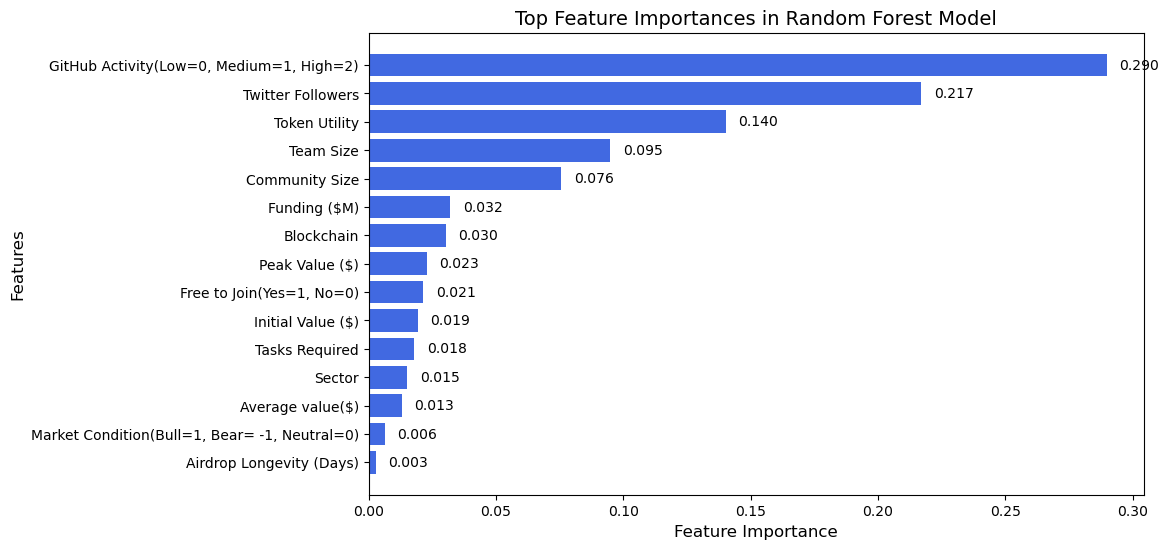

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance values
feature_importance = best_rf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]  # Sort in descending order

# Select top N important features (adjust as needed)
top_n = 15  # Change this to view more/less features
top_features = X_train.columns[sorted_idx][:top_n]
top_importance = feature_importance[sorted_idx][:top_n]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importance[::-1], color="royalblue")  # Reverse for better readability
plt.xlabel("Feature Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Top Feature Importances in Random Forest Model", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display importance values on bars
for i, v in enumerate(top_importance[::-1]):
    plt.text(v + 0.005, i, f"{v:.3f}", fontsize=10, verticalalignment="center")

plt.show()


In [45]:
import joblib
joblib.dump(best_rf, "RandomForest_Airdrop_Model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [47]:
# Load the saved model
loaded_model = joblib.load("RandomForest_Airdrop_Model.pkl")

# Test with a small batch from X_test
sample_prediction = loaded_model.predict(X_test[:5])
print("📊 Sample Predictions:", sample_prediction)


📊 Sample Predictions: [5.777 6.389 6.1   5.429 3.542]


In [79]:
!pip install streamlit pandas joblib


In [91]:
!pip uninstall streamlit -y
!pip install --upgrade streamlit


Found existing installation: streamlit 1.30.0
Uninstalling streamlit-1.30.0:
  Successfully uninstalled streamlit-1.30.0
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.6/9.6 MB 17.5 MB/s eta 0:00:01
   --- ------------------------------------ 0.9/9.6 MB 11.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.7/9.6 MB 13.6 MB/s eta 0:00:01
   ---------- ----------------------------- 2.4/9.6 MB 12.9 MB/s eta 0:00:01
   ---------- ----------------------------- 2.6/9.6 MB 12.7 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.6 MB 10.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.6 MB 10.7 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 11.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.6 MB 10.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.3/9.6 MB 10.9 MB/s eta 0:00:01
   ---------------------- --------------

In [98]:
import pandas as pd

train_df = pd.read_csv("Processed_Training_Data.csv")
print("Training Features:", train_df.columns.tolist())


Training Features: ['Project Name', 'Funding ($M)', 'Tasks Required', 'Free to Join(Yes=1, No=0)', 'VC Backing(Yes=1, No=0)', 'Airdrop Longevity (Days)', 'Token Utility', 'Team Size', 'GitHub Activity(Low=0, Medium=1, High=2)', 'Twitter Followers', 'Community Size', 'Market Condition(Bull=1, Bear= -1, Neutral=0)', 'Blockchain', 'Sector', 'Initial Value ($)', 'Peak Value ($)', 'Average value($)', 'Success Score (0-10)']


In [118]:
code = """  
import streamlit as st  
import joblib  
import pandas as pd  

# Load trained model  
model = joblib.load("RandomForest_Airdrop_Model.pkl")  

# Streamlit UI  
st.title("Crypto Airdrop Success Predictor")  
st.write("Enter details about the airdrop project to predict its success score.")  

# User Inputs  
funding = st.number_input("Funding Amount ($M)", min_value=0.0, step=0.1)  
tasks_required = st.selectbox("Tasks Required", ["None", "Social Engagement", "Referral", "Staking", "Multiple"])  
free_to_join = st.selectbox("Free to Join?", ["Yes", "No"])  
vc_backing = st.selectbox("VC Backing?", ["Yes", "No"])  
airdrops_longevity = st.number_input("Airdrop Longevity (Days)", min_value=0, step=1)  
token_utility = st.selectbox("Token Utility", ["Governance", "Payment", "Staking", "Other"])  
team_size = st.number_input("Team Size", min_value=1, step=1)  
github_activity = st.selectbox("GitHub Activity", ["Low", "Medium", "High"])  
twitter_followers = st.number_input("Twitter Followers", min_value=0, step=100)  
community_size = st.number_input("Community Size", min_value=0, step=100)  
market_condition = st.selectbox("Market Condition", ["Bull", "Bear", "Neutral"])  
blockchain = st.selectbox("Blockchain", ["Ethereum", "Solana", "Polygon", "BNB Chain", "Other"])  
sector = st.text_input("Sector (e.g., DeFi, NFT, Gaming)")
initial_value = st.number_input("Initial Value ($)", min_value=0.0, step=0.01)  
peak_value = st.number_input("Peak Value ($)", min_value=0.0, step=0.01)  
average_value = st.number_input("Average Value ($)", min_value=0.0, step=0.01)  

# Convert categorical inputs to numerical  
tasks_required_mapping = {"None": 0, "Social Engagement": 1, "Referral": 2, "Staking": 3, "Multiple": 4}  
free_to_join_mapping = {"Yes": 1, "No": 0}  
vc_backing_mapping = {"Yes": 1, "No": 0}  
token_utility_mapping = {"Governance": 0, "Payment": 1, "Staking": 2, "Other": 3}  
github_mapping = {"Low": 0, "Medium": 1, "High": 2}  
market_mapping = {"Bull": 1, "Bear": -1, "Neutral": 0}  
blockchain_mapping = {"Ethereum": 0, "Solana": 1, "Polygon": 2, "BNB Chain": 3, "Other": 4}  

# Encode categorical values  
tasks_required_encoded = tasks_required_mapping[tasks_required]  
free_to_join_encoded = free_to_join_mapping[free_to_join]  
vc_backing_encoded = vc_backing_mapping[vc_backing]  
token_utility_encoded = token_utility_mapping[token_utility]  
github_encoded = github_mapping[github_activity]  
market_encoded = market_mapping[market_condition]  
blockchain_encoded = blockchain_mapping[blockchain]  

sector_mapping = {"DeFi": 0, "NFT": 1, "Gaming": 2, "Infrastructure": 3, "Other": 4}
sector_encoded = sector_mapping.get(sector, 4)  # Default to "Other" if not found

# Predict button  
if st.button("Predict Airdrop Success"):  
    input_data = pd.DataFrame([[funding, tasks_required_encoded, free_to_join_encoded, vc_backing_encoded,  
                            airdrops_longevity, token_utility_encoded, team_size, github_encoded,  
                            twitter_followers, community_size, market_encoded, blockchain_encoded, sector_encoded,
                            initial_value, peak_value, average_value]],  
                          columns=["Funding ($M)", "Tasks Required", "Free to Join(Yes=1, No=0)", "VC Backing(Yes=1, No=0)",  
                                   "Airdrop Longevity (Days)", "Token Utility", "Team Size", "GitHub Activity(Low=0, Medium=1, High=2)",  
                                   "Twitter Followers", "Community Size", "Market Condition(Bull=1, Bear= -1, Neutral=0)",  
                                   "Blockchain",  "Sector", "Initial Value ($)", "Peak Value ($)", "Average value($)"])  
    prediction = model.predict(input_data)  
    st.success(f"Predicted Success Score: {prediction[0]:.2f}")  
"""  

# Save the script  
with open("airdrop_predictor.py", "w") as f:  
    f.write(code)  

print("✅ Web app script updated successfully!")  


✅ Web app script updated successfully!


In [ ]:
!streamlit run airdrop_predictor.py